# Deriving Numerov's Method
## Background
- The Numerov method can be used for functions of the form
$$\frac{d^2y}{dx^2} = g(x)y(x) + s(x)$$



## steps
- taylor expand the general differential equation
- apply to discrete space
- use forward and backward step to cancel odd terms
- do some mathematical magic to get it in "nice" terms


$$y'' = g(x)y(x) + s(x)$$

Begin by using the formula for a Taylor expansion.
$$y(x) = y(x_{0}) + (x - x_{0})y'(x_{0}) + \frac{(x - x_{0})^2}{2!}y''(x_{0}) + \frac{(x - x_{0})^3}{3!}y'''(x_{0}) +\frac{(x - x_{0})^4}{4!}y''''(x_{0}) + \frac{(x - x_{0})^5}{5!}y'''''(x_{0}) + O(h^6)$$

Set $x = x_{0} + h$ and $h = x - x_{0}$ leaving us with:
$$y(x_{0} + h) = y(x_{0}) + hy'(x_{0}) + \frac{h^2}{2!}y''(x_{0}) + \frac{h^3}{3!}y'''(x_{0}) +\frac{h^4}{4!}y''''(x_{0}) + \frac{h^5}{5!}y'''''(x_{0}) + O(h^6)$$

We now discretize the space using the following rule $h = x_{n+1} - x_{n}$. If we plug in $n = 0$ we get 
$$ h = x_{1} - x_{0}$$
and consequently
$$x_{1} = x_{0} + h$$
this means we can rewrite
$$y(x_{0} + h) = y(x_{0}) + hy'(x_{0}) + \frac{h^2}{2!}y''(x_{0}) + \frac{h^3}{3!}y'''(x_{0}) +\frac{h^4}{4!}y''''(x_{0}) + \frac{h^5}{5!}y'''''(x_{0}) + O(h^6)$$
as
$$y(x_{1}) = y(x_{0}) + hy'(x_{0}) + \frac{h^2}{2!}y''(x_{0}) + \frac{h^3}{3!}y'''(x_{0}) +\frac{h^4}{4!}y''''(x_{0}) + \frac{h^5}{5!}y'''''(x_{0}) + O(h^6)$$
Where we adopt the shorthand that $y(x_{n}) = y_{n}$
$$y_{1} = y_{0} + hy'(x_{0}) + \frac{h^2}{2!}y''(x_{0}) + \frac{h^3}{3!}y'''(x_{0}) +\frac{h^4}{4!}y''''(x_{0}) + \frac{h^5}{5!}y'''''(x_{0}) + O(h^6)$$
From this we make the observation that 
$$y_{n + 1} = y_{n} + hy'(x_{n}) + \frac{h^2}{2!}y''(x_{n}) + \frac{h^3}{3!}y'''(x_{n}) +\frac{h^4}{4!}y''''(x_{n}) + \frac{h^5}{5!}y'''''(x_{n}) + O(h^6)$$
Similarly, if we want to take a step backwards we can replace every $h$ with $-h$
$$y_{n - 1} = y_{n} - hy'(x_{n}) + \frac{h^2}{2!}y''(x_{n}) - \frac{h^3}{3!}y'''(x_{n}) +\frac{h^4}{4!}y''''(x_{n}) - \frac{h^5}{5!}y'''''(x_{n}) + O(h^6)$$
The odd terms are the only ones that change sign. Next, we can add the two expressions together.
$$y_{n+1} + y_{n-1} = 2y_{n} + h^2y_{n}'' + \frac{h^4}{12}y_{n}'''' + O(h^6)$$
Rearranging
$$y_{n+1} -2y_{n} + y_{n-1} = + h^2y_{n}'' + \frac{h^4}{12}y_{n}'''' + O(h^6)$$




From the statement of the problem
$$y''(x) = -g(x)y(x) + s(x)$$
$$y_{n}'' = -g_{n}y_{n} + s_{n}$$
So in continuous variables we have..
$$y''''(x) =\frac{d^2}{dx^2}(-g(x)y(x) + s(x))$$
and in discrete variables we have...

$$y_{n}'''' = \frac{d^2}{dx^2}(g_{n}y_{n} + s_{n})$$

Remember that the second derivative can be approximated as a finite difference scheme:
$$f''(x)\approx {\frac {{\frac {f(x+h)-f(x)}{h}}-{\frac {f(x)-f(x-h)}{h}}}{h}}={\frac {f(x+h)-2f(x)+f(x-h)}{h^{2}}}.$$

let
$$f(x+h) = g(x+h)y(x+h) + s(x+h)$$
$$f(x) = g(x)y(x) + s(x)$$
$$f(x-h) = g(x-h)y(x-h) + s(x-h)$$

Now plug these terms into the finite difference scheme:
$$y''''(x) = f''(x) = \frac{g(x+h)y(x+h) + s(x+h) + 2g(x)y(x) - 2s(x) +g(x-h)y(x-h) + s(x-h)}{h^2}$$
Converting to discrete space:
$$y_{n}'''' = \frac{g_{n+1}y_{n+1} + s_{n+1} + 2g_{n}y_{n} - 2s_{n} +g_{n-1}y_{n-1} + s_{n-1}}{h^2}$$




Now that we have an expression for $y_{n}''''$ we can substitute this back into
$$y_{n+1} -2y_{n} + y_{n-1} = h^2y_{n}'' + \frac{h^4}{12}y_{n}'''' + O(h^6)$$
leaving the following equation:
$$y_{n+1} -2y_{n} + y_{n-1} = h^2y_{n}'' + \frac{h^4}{12}(\frac{-g_{n+1}y_{n+1} + s_{n+1} + 2g_{n}y_{n} - 2s_{n} + g_{n-1}y_{n-1} + s_{n-1}}{h^2}) + O(h^6)$$
Cancelling $h^2$
$$y_{n+1} -2y_{n} + y_{n-1} = h^2y_{n}'' + \frac{h^2}{12}(g_{n+1}y_{n+1} + s_{n+1} + 2g_{n}y_{n} - 2s_{n} + g_{n-1}y_{n-1} + s_{n-1}) + O(h^6)$$
This is a very unwieldy expression so let's try to see if we can pull together some common terms with subscript $n+1$, $n$ and $n-1$. The right side has the same form as the finite difference formula, we can probably match these terms up with the $y_{n+1} -2y_{n} + y_{n-1}$
$$y_{n+1} -2y_{n} + y_{n-1} = h^2y_{n}'' + \frac{h^2}{12}(g_{n+1}y_{n+1} + s_{n+1} -2g_{n}y_{n} - 2s_{n} + g_{n-1}y_{n-1} + s_{n-1}) + O(h^6)$$
$$[y_{n+1} - \frac{h^2}{12}(g_{n+1}y_{n+1}) - \frac{h^2}{12}(s_{n+1})] 
 + 2[-y_{n} +\frac{h^2}{12}(g_{n}y_{n}) + \frac{h^2}{12}(s_{n})] + 
[y_{n-1} - \frac{h^2}{12}(g_{n-1}y_{n-1}) - \frac{h^2}{12}(s_{n-1})]
= h^2y_{n}'' + O(h^6)$$


The first bracketed term
$$[y_{n+1} -\frac{h^2}{12}g_{n+1}y_{n+1} - \frac{h^2}{12}s_{n+1}]$$
becomes 
$$[y_{n+1}(1 - \frac{h^2}{12}g_{n+1}) - \frac{h^2}{12}s_{n+1}]$$
The second bracketed term 
$$2[-y_{n} +\frac{h^2}{12}g_{n}y_{n} + \frac{h^2}{12}s_{n}]$$
becomes
$$-2[y_{n}(1 - \frac{h^2}{12}g_{n}) - \frac{h^2}{12}s_{n}] $$
and finally
$$[y_{n-1} - \frac{h^2}{12}(g_{n-1}y_{n-1}) - \frac{h^2}{12}(s_{n-1})]$$
becomes
$$[y_{n-1}(1 - \frac{h^2}{12}g_{n-1}) - \frac{h^2}{12}s_{n-1}]$$



Each of these similar terms can be absorbed into a new variable $w_{n}$
$$w_{n} = y_{n}(1 - \frac{h^2}{12}g_{n}) - \frac{h^2}{12}s_{n}$$
simplifying our unwieldy expression to
$$w_{n+1} 
 - 2w_{n} + w_{n-1} = h^2y_{n}'' + O(h^6)$$
 and substituting $y_{n}'' =g_{n}y_{n} + s_{n}$.  We arrive at our final answer:

$$w_{n+1} 
 - 2w_{n} + w_{n-1} = h^2(g_{n}y_{n} + s_{n}) + O(h^6)$$
 


 We need to remember that
 $$y_{n} = \frac{w_{n} + \frac{h^2}{12}s_{n}}{1 - \frac{h^2}{12}g_{n}}$$


## Practical Considerations
To implement the method there are a few practical considerations, for example:
- How do we start the calculation method without knowing the value of the first step?

We take two small values and set them equal to $y_{0}$ and $y_{1}$, let $y_{0} = 0$ and $y_{1} = 0.001$ 
$$w_{0} = y_{0}(1 - \frac{h^2}{12}g_{0}) - \frac{h^2}{12}s_{0}$$
and
$$w_{1} = y_{1}(1 - \frac{h^2}{12}g_{1}) - \frac{h^2}{12}s_{1}$$
So now we have taken the first two steps and can use this formula:
$$w_{n+1} = 2w_{n} - w_{n-1} + h^2(g_{n}y_{n} + s_{n})$$
for the case
$$w_{2} = 2w_{1} - w_{0} + h^2(g_{1}y_{1} + s_{1})$$

 


In short, you need to give the Numerov method the first and second step, the first step can be zero and the second step should be a small positive number.


## simplified numerov
Numerov's Method can be simplified for differential equations where $s(x) = 0$
$$y'' = g(x)y(x)$$
The $w$ term simply loses the $s$ terms.

Note: this routine was taken directly from Kristjan Haule's LAPW code

In [15]:
import numpy as np
def Numerov(F, dx, f0=0.0, f1=1e-3):
    Nmax = len(F)
    dx = float(dx)
    Solution = np.zeros(Nmax, dtype=float)
    Solution[0] = f0
    Solution[1] = f1
    h2 = dx*dx;
    h12 = h2/12;
      
    w0 = (1-h12*F[0])*Solution[0];
    Fx = F[1];
    w1 = (1-h12*Fx)*Solution[1];
    Phi = Solution[1];
      
    w2 = 0.0
    for i in range(2, Nmax):
        w2 = 2*w1 - w0 + h2*Phi*Fx;
        w0 = w1;
        w1 = w2;
        Fx = F[i];
        Phi = w2/(1-h12*Fx);
        Solution[i] = Phi;
    return Solution



## Generalized Numerov

Note: this routine was taken directly from Kristjan Haule's LAPW code

In [16]:

def NumerovGen(F, U, dx, f0=0.0, f1=1e-3):
    Nmax = len(F)
    dx = float(dx)
    Solution = np.zeros(Nmax, dtype=float)
    Solution[0] = f0
    Solution[1] = f1

    h2 = dx * dx
    h12 = h2 / 12

    w0 = Solution[0] * (1 - h12 * F[0]) - h12 * U[0]
    w1 = Solution[1] * (1 - h12 * F[1]) - h12 * U[1]
    Phi = Solution[1]

    for i in range(2, Nmax):
        Fx = F[i]
        Ux = U[i]
        w2 = 2 * w1 - w0 + h2 * (Phi * Fx + Ux)
        w0 = w1
        w1 = w2
        Phi = (w2 + h12 * Ux) / (1 - h12 * Fx)
        Solution[i] = Phi

    return Solution


Numerov's method presumes that the differential equation is of the form

$$\frac{d^2y}{dx^2} = g(x)y(x)$$


Which is not too far off from the infinite square well hamiltonian, with the function $g(x)$ actually being a constant $-\frac{2 m E}{h^2}$.

$$\frac{d^2}{d x^2} \psi(x)=-\frac{2 m E}{h^2} \psi(x)$$

Feel free to mess with the "constant" to change the result. Note that this is not a valid wavefunction because it is not normalized. 

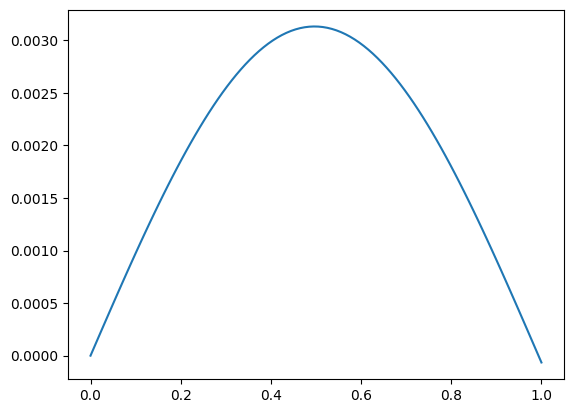

In [17]:
import matplotlib.pyplot as plt
constant = -10.0
x = np.linspace(0,1,100)
isw_rhs = constant*np.ones(len(x))

sol = Numerov(isw_rhs, x[1]-x[0], 0.00, 0.0001)

plt.plot(x, sol)
plt.show()